<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/15_1_1_PRACTICE_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  MLP using Keras

## Description

The aim of this exercise is to come up with a simple Multi-layer perceptron classifier using tensorflow.

# Instructions:
1. Read the csv file as a pandas dataframe.
2. Assign the dependent and independent variables. The target is your dependent variable. All the other columns are your predictors.
3. Split the dataset into train and validation sets.
4. Define the network parameters for the MLP.
5. Initialise the weights and biases of the network.
6. Define the MLP model with input, hidden and output layers.
7. Fit the model on the training data.
8. Compute and print the train and validation accuracy.
9. Compare the output of the MLP classifier with a logistic model. Find out which model performs better and why it does so?

## About the dataset

The dataset used here is the Faults dataset. This dataset has several features  to predict the target.

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects.

There are 34 fields. The first 27 fields describe some kind of steel plate faults seen in images. Unfortunately, there is no other information that we know of to describe these columns.

- `X_Minimum`
- `X_Maximum`
- `Y_Minimum`
- `Y_Maximum`
- `Pixels_Areas`
- `X_Perimeter`
- `Y_Perimeter`
- `SumofLuminosity`
- `MinimumofLuminosity`
- `MaximumofLuminosity`
- `LengthofConveyer`
- `TypeOfSteel_A300`
- `TypeOfSteel_A400`
- `SteelPlateThickness`
- `Edges_Index`
- `Empty_Index`
- `Square_Index`
- `OutsideXIndex`
- `EdgesXIndex`
- `EdgesYIndex`
- `OutsideGlobalIndex`
- `LogOfAreas`
- `LogXIndex`
- `LogYIndex`
- `Orientation_Index`
- `Luminosity_Index`
- `SigmoidOfAreas`

# Hints:

<a href="https://keras.io/api/layers/merging_layers/add/" target="_blank">keras.add()</a> : To add a layer to the model

<a href="https://keras.io/api/models/sequential/" target="_blank">keras.fit()</a> : Fit the model for the data

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.evaluate()</a> : Evaluate model performance on predictors vs true values


In [ ]:
# Import the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [ ]:
# Read the file 'faults.csv'
!gdown "1rIXVx7djSMDnITReilg-_t5KJAPfW2D7"
df = pd.read_csv('faults.csv')

Downloading...
From: https://drive.google.com/uc?id=1rIXVx7djSMDnITReilg-_t5KJAPfW2D7
To: /content/faults.csv
100% 291k/291k [00:00<00:00, 82.5MB/s]


In [ ]:
# Take a quick look at the dataset
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [ ]:
# We use one-hot-encoding to encode the 'target' labels using pd.get_dummies

one_hot_df = pd.get_dummies(df['target'], prefix='target')

In [ ]:
# The predictor variables are all columns except target
X = df.drop(['target'],axis=1).values
# The response variable is the one-hot-encoded target values
y = one_hot_df.values

In [ ]:
print(np.isnan(X).sum(), np.isinf(X).sum())
print(np.isnan(y).sum(), np.isinf(y).sum())

80 0
0 0


In [ ]:
df = pd.DataFrame(X)
df = df.fillna(df.mean())
X = df.to_numpy()

print(np.isnan(X).sum(), np.isinf(X).sum())
print(np.isnan(y).sum(), np.isinf(y).sum())

0 0
0 0


In [ ]:
# We divide our data into test and train sets with 80% training size

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1552, 27) (389, 27) (1552, 7) (389, 7)


In [ ]:
# To build the MLP, we will use the keras library

model = tf.keras.models.Sequential(name='MLP')

# To initialise our model we set some parameters
# commonly defined in an MLP design

# The number of nodes in a hidden layer
# (n_input + n_output) // 2
# (27 + 7) // 2 = 17
n_hidden = 17

# The number of nodes in the input layer (features)
n_input = 27

# The number of nodes in the output layer
n_output = 7

In [ ]:
# Add the input layer to specify the shape of the inputs
model.add(tf.keras.layers.InputLayer(input_shape=(n_input,)))

# We add the hidden layer with `n_hidden` number of neurons
# and 'relu' activation
model.add((tf.keras.layers.Dense(n_hidden,  activation='relu',name='hidden')))

# The second layer is the final layer in our case, using 'softmax' on the output labels
model.add(tf.keras.layers.Dense(n_output, activation = 'softmax',name='output'))

In [ ]:
# Now we compile the model using 'categorical_crossentropy' loss,
# optimizer as 'sgd' and 'accuracy' as a metric


model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, clipvalue=1.0),  # Try a lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# You can see an overview of the model you built using .summary()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 17)                476       
                                                                 
 output (Dense)              (None, 7)                 126       
                                                                 
Total params: 602 (2.35 KB)
Trainable params: 602 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# We fit the model, and save it to a variable 'history' that can be
# accessed later to analyze the training profile
# We also set validation_split=0.2 for 20% of training data to be
# used for validation
# verbose=0 means you will not see the output after every epoch.
# Set verbose=1 to see it

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
39/39 [==============================] - 1s 7ms/step - loss: 102955.9297 - accuracy: 0.2498 - val_loss: 60972.9844 - val_accuracy: 0.1543
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 42490.6523 - accuracy: 0.2587 - val_loss: 17346.7676 - val_accuracy: 0.3859
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 28848.5156 - accuracy: 0.2691 - val_loss: 34004.6094 - val_accuracy: 0.1350
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 35450.5703 - accuracy: 0.2595 - val_loss: 33082.4062 - val_accuracy: 0.3666
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 35247.8203 - accuracy: 0.2635 - val_loss: 23326.8184 - val_accuracy: 0.3666
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 34714.1836 - accuracy: 0.2554 - val_loss: 66179.5078 - val_accuracy: 0.1318
Epoch 7/50
39/39 [==============================] - 0s 3ms/step - loss: 40467.2539 - accuracy: 0.2603 - val_los

Text(0.5, 0.98, 'MLP Training')

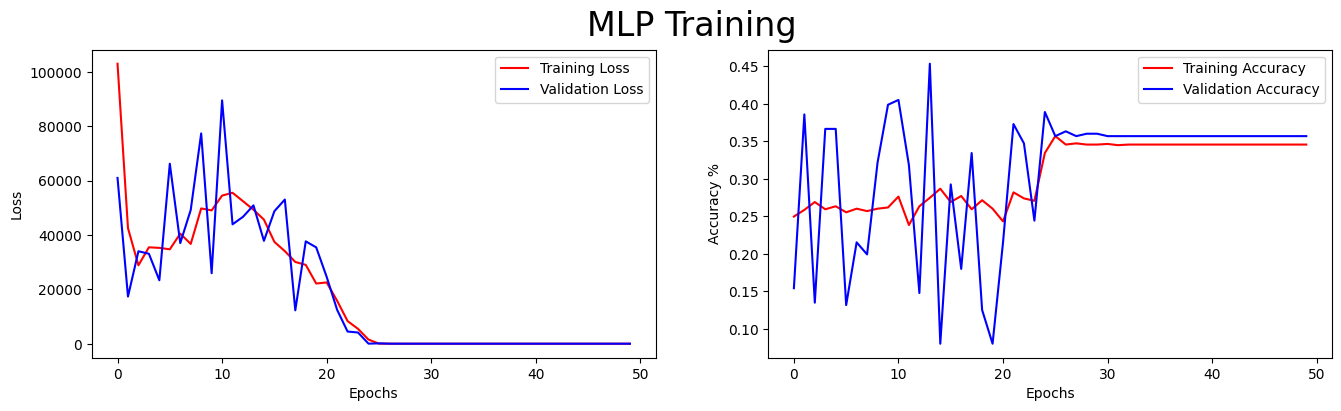

In [ ]:
# Here we plot the training and validation loss and accuracy

fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history.history['loss'],'r',label = 'Training Loss')
ax[0].plot(history.history['val_loss'],'b',label = 'Validation Loss')
ax[1].plot(history.history['accuracy'],'r',label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

In [ ]:
# Once you have near-perfect validation accuracy, it's time to evaluate model performance on test set

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train)[1]
# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test)[1]
print(f'The training set accuracy for the model is {train_accuracy}\
    \n The test set accuracy for the model is {test_accuracy}')

13/13 [==============================] - 0s 3ms/step - loss: 1.6584 - accuracy: 0.3599
The training set accuracy for the model is 0.3479381501674652    
 The test set accuracy for the model is 0.3598971664905548


In [ ]:
# compute Precision, Recall, F1 for each class